<a href="https://colab.research.google.com/github/dina-masry/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales
- Author: Dina-masry

##Project Overview

##Load and Inspect Data

In [1]:
import pandas as pd
fname = '/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(fname)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Clean Data

In [3]:
df.shape

(8523, 12)

 - There are 8523 rows and 12 columns

In [4]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


 - All data types are as they should be

In [5]:
# duplicated rows
df.duplicated().sum()

np.int64(0)

 - There are no duplicated rows

In [6]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [7]:
df.isna().sum()/len(df)*100

,0
Item_Identifier,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Identifier,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000


 - There are 1463 missing values in Item_Weight column (17.16%)
 - There are 2410 missing values in Outlet_Size (28.276%)

### Handle missing values in Item_Weight column

In [8]:
df['Item_Weight'].value_counts().sort_values(ascending=False)

,count
Item_Weight,
12.150,86
17.600,82
13.650,77
11.800,76
15.100,68
...,...
8.800,2
6.520,1
9.420,1


-Strategy 1 : fill missing values with the most frequent value. \
-Strategy 2: fill missing values with the mean , if there are not outliers\
-Strategy 3: fill missing values with the median , if there are outliers\
-Strategy 4: fill missing values with unexpected values like 0 or -1

<Axes: xlabel='Item_Weight'>

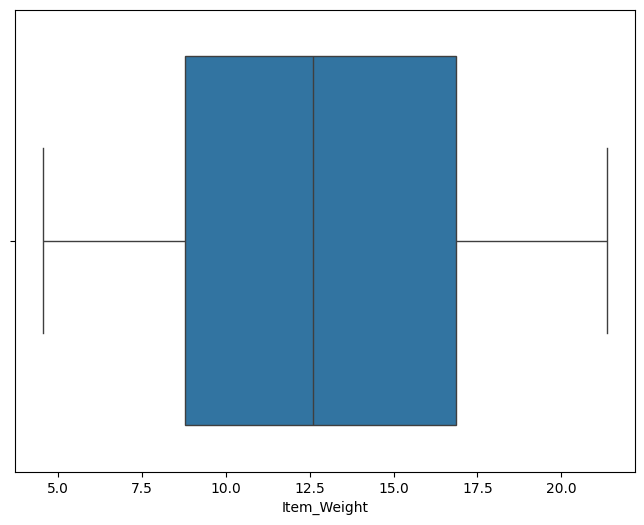

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Item_Weight'])

 - It is noticed from boxPlot that there is not any outlier , so we can handle missing values with  the mean

In [10]:
df['Item_Weight'].mean()

np.float64(12.857645184135976)

In [11]:
# df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [12]:
df['Item_Weight'].isna().sum()

np.int64(1463)

In [13]:
df['Item_Weight'].mean() # note that mean did not affect , it is still the same

np.float64(12.857645184135976)

### Handle missing values in Outlet_Size

In [14]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


- We have two options to handle missing values in Outlet_Size column:\
Strategy 1 : fill missing values with the mode (Medium) \
Strategy 2 : fill missing values with 'Unknown' or 'missing'

- I will choose strategy 2

In [15]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('missing')

In [16]:
df['Outlet_Size'].isna().sum()

np.int64(0)

In [17]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
missing,2410
Small,2388
High,932


In [18]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


### Checking consistency

In [19]:
pd.set_option('display.max_rows', None)
df.head()
cat_cols = df.select_dtypes('object').columns
for col in cat_cols:
  print(df[col].value_counts())
  print('---------------------------')


Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
FDW26     9
NCQ06     9
DRN47     9
FDV38     9
FDX20     9
DRE49     9
NCI54     9
FDU12     9
FDG09     9
FDP25     9
FDF52     9
FDO19     9
FDF56     9
FDV60     9
NCF42     9
NCJ30     9
FDX04     9
FDQ40     9
FDW49     9
FDD38     9
NCB18     9
NCL31     9
DRA59     8
FDR52     8
FDC14     8
FDF04     8
FDA15     8
FDO10     8
FDA13     8
FDF22     8
FDT49     8
FDN56     8
FDW24     8
FDV26     8
NCO54     8
DRK35     8
FDA44     8
FDA50     8
FDR48     8
FDR43     8
FDE11     8
FDQ39     8
FDT40     8
NCI29     8
FDJ58     8
FDD29     8
DRF03     8
FDT55     8
FDR59     8
NCQ43     8
FDX58     8
FDX50     8
NCB31     8
FDS52     8
FDO32     8
FDY47     8
DRF23     8
FDD05     8
FDH10     8
FDW48     8
FDS55     8
FDZ33     8
FDB17     8
FDT24     8
NCM07     8
DRP35     8
NCK53     8
DRI03     8
FDL34     8
DRF01     8
FDH27     8
FDR04     8
FDS33     8
FDY49     8
FDV09     8
FDU23     8
FDU13     8


- There inconsistency in Item_Fat_Content as \
low Fat = low fat = LF \
Regular = reg

In [20]:
#Handle consistency in Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts() # show that it becomes consistent

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


### Obtain summary statistics (min ,max , mean ) for numerical columns

In [21]:
num_cols = df.select_dtypes(include='number').columns
df[num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##Exploratory Data Analysis

In [22]:
#checking info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [23]:
# Getting numeric columns
numeric_cols= df.select_dtypes('number').columns
numeric_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

def plot_numeric(df,col,title1,title2):
  fig, ax = plt.subplots(nrows= 2, figsize=(10, 6),sharex=True )
  sns.histplot(data=df, x=col, ax=ax[0])
  sns.boxplot(data=df, x=col, ax=ax[1])
  # styling
  fig.patch.set_facecolor('black')
  fig.patch.set_edgecolor('white')
  fig.patch.set_linewidth(2)
  for spine in ax[0].spines.values():
    spine.set_color('white')
  for spine in ax[1].spines.values():
    spine.set_color('white')
  ax[0].set_facecolor('black')
  ax[1].set_facecolor('black')
  ax[0].tick_params(colors='white')
  ax[1].tick_params(colors='white')
  ax[0].set_xlabel(col ,color='white')
  ax[1].set_xlabel(col,color='white')
  ax[0].set_ylabel('Count',color='white')
  ax[1].set_ylabel('Count',color= 'white')
  ax[0].set_title(title1 ,color= 'white')
  ax[1].set_title(title2, color= 'white')
  med_value = df[col].median()
  ax[0].axvline(med_value,color='green', ls='--',label=f"Median Value = ${med_value:,.2f}");
  mean_value = df[col].mean()
  ax[0].axvline(mean_value,color='red', ls='--',label=f"Mean Value = ${mean_value:,.2f}",);

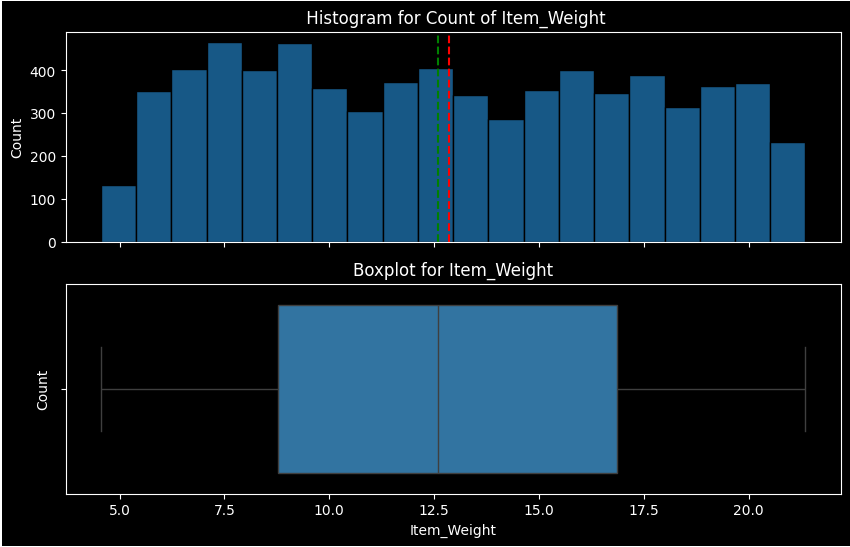

In [25]:
plot_numeric(df,numeric_cols[0],' Histogram for Count of Item_Weight', 'Boxplot for Item_Weight')

- Histogram shows that Item weights between 12.5 and 13.5 have the most frequency count ~=1600 and differ alot from the other values which their counts are less than 500.
-Boxplot shows
 - min is nearby 4.5
 - max is nearby 21
 - Q1 is nearby 9
 - Median is nearby 13
 - Q3 is nearby 16
 - There is no any outliers
 - Graph seems to be left skewed


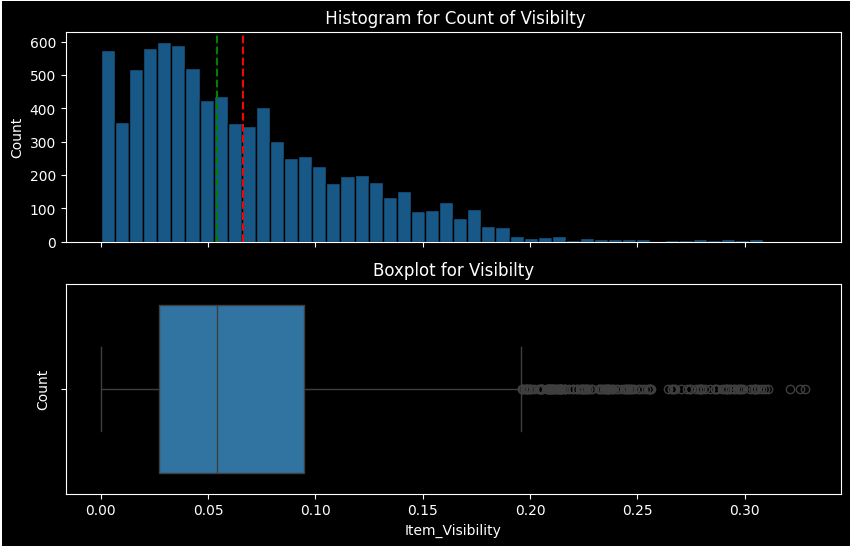

In [26]:
plot_numeric(df,numeric_cols[1],' Histogram for Count of Visibilty', 'Boxplot for Visibilty')

- This histogram shows that Item_visibilty values is the most frequency is less than 1
- Boxplot shows than:
 - min is 0
 - max is nearby 0.33
 - median is nearby 0.06
 - Q1 is nearby 0.03
 - Q3 is nearby 0.9
 - There are lots of outliers
 - It seems to be right skewed

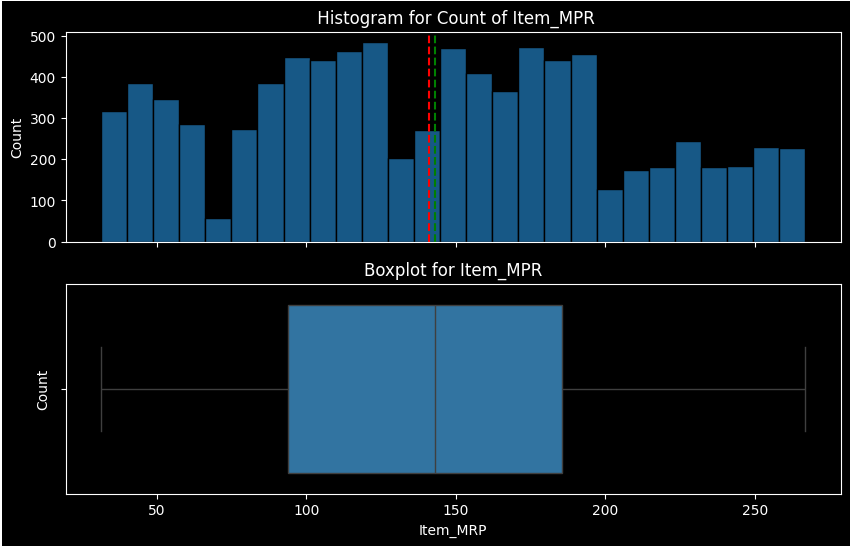

In [27]:
plot_numeric(df,numeric_cols[2],' Histogram for Count of Item_MPR', 'Boxplot for Item_MPR')

- Histogram shows that there is s group between 50 and 70 differs from its surrounded groups as its count is less than 100. Graph may be multimodel
- Boxplot shows that:
 - min is nearby 30
 -Q1 is nearby 90
 - Median is nearby 140
 -Q3 is nearby 180
 -max is nearby 270

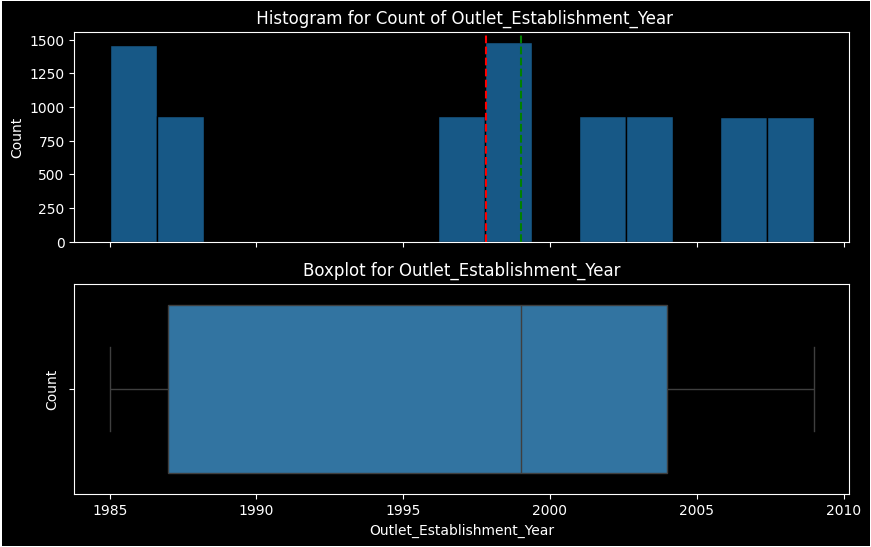

In [28]:
plot_numeric(df,numeric_cols[3],' Histogram for Count of Outlet_Establishment_Year', 'Boxplot for Outlet_Establishment_Year')

-Histogram shows that there is a difference in distribution , like there is no outlet establishment from nearby 1988 to 1996 .
- Boxplot shows that:
 - min is nearby 1985
 -Q1 is nearby 1987
 -Median is nearby 1999
 -Q3 is nearby  2004
 -Max is nearby 2009
 -There is no outliers
 It seems to be left skewed


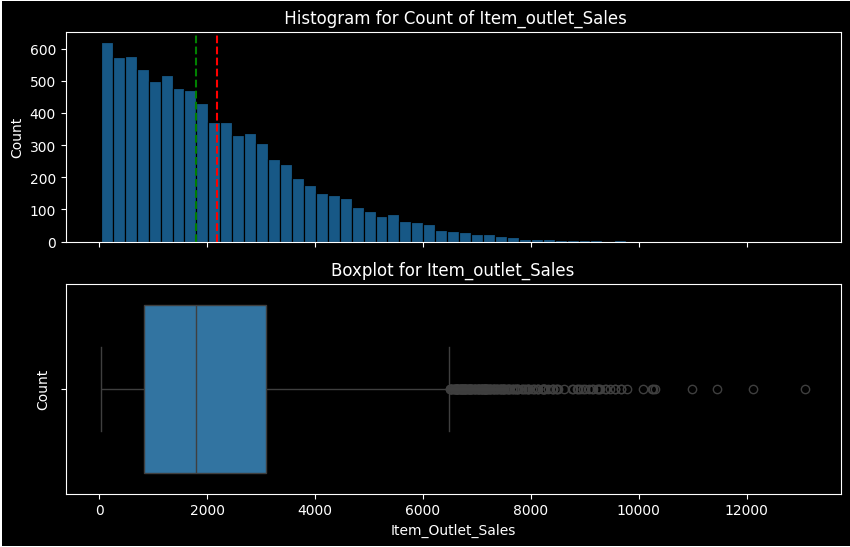

In [29]:
plot_numeric(df,numeric_cols[4],' Histogram for Count of Item_outlet_Sales', 'Boxplot for Item_outlet_Sales')

- Histogram shows that in general , less outlet sales have a higher counts.
- Boxplot shows that:
 - min is nearby 40
 -Q1 is nearby 850
 -Median is nearby 1800
 - Q3 is nearby 3000
 -Max is nearby 13500

In [30]:
#Getting categorical coulmns
cat_cols= df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [31]:
def plot_cat(df,col,title):
  fig, ax = plt.subplots(figsize=(8, 6))
  fig.patch.set_facecolor('black')
  fig.patch.set_edgecolor('white')
  fig.patch.set_linewidth(2)
  ax.set_facecolor('black')
  ax.tick_params(colors='white')
  ax.set_xlabel(col ,color='white')
  ax.set_ylabel('Count',color='white')
  for spine in ax.spines.values():
    spine.set_color('white')
  sns.countplot(data=df, x=col, ax=ax, hue= col , palette='Set2')
  ax.set_title(title,color= 'white')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [32]:
df['Item_Identifier'].nunique()

1559

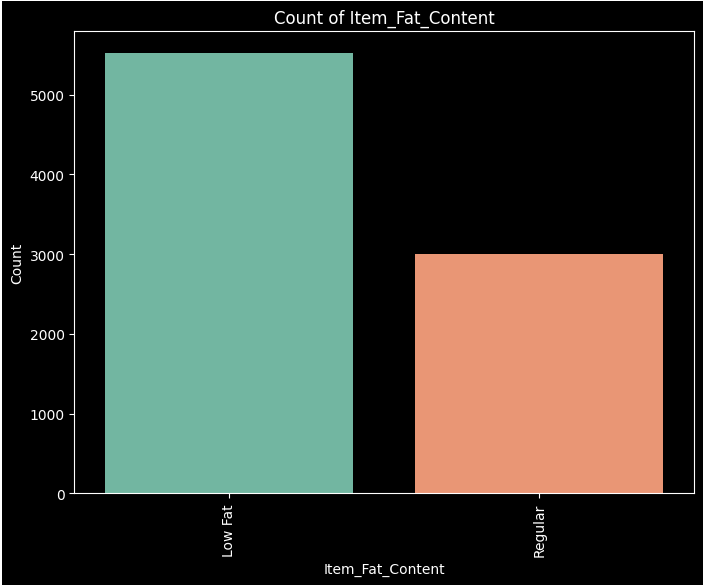

In [33]:
plot_cat(df,cat_cols[1],'Count of Item_Fat_Content')

- This countplot shows that low fat has the highest frequency

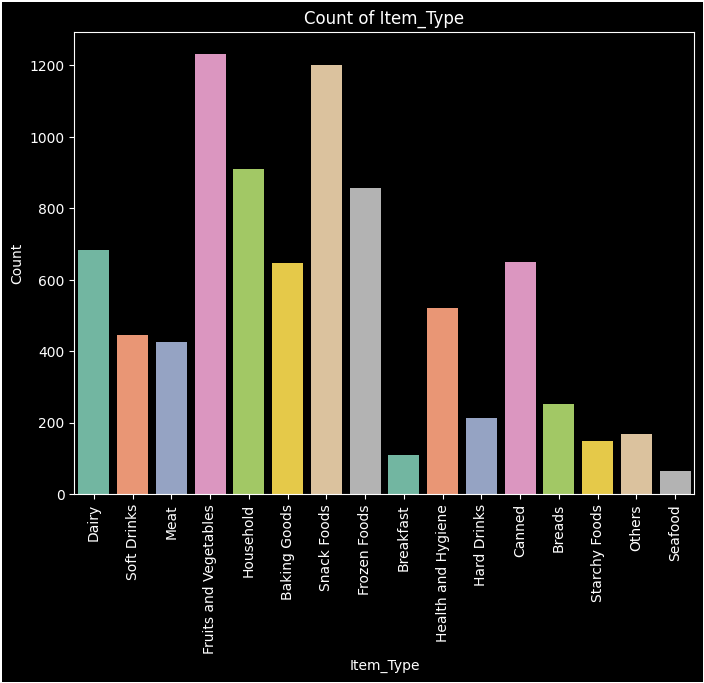

In [34]:
plot_cat(df,cat_cols[2],'Count of Item_Type')

- This countplot shows that fruits and vegetables have the highest count while seafood has the lowest

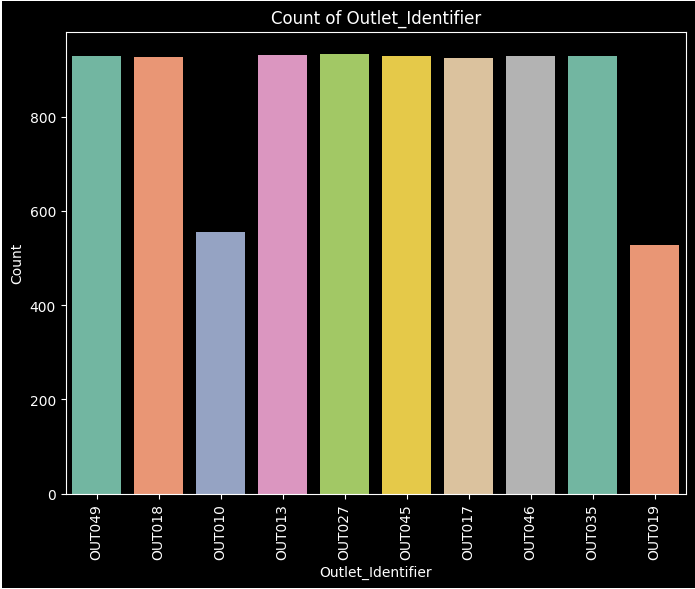

In [35]:
plot_cat(df,cat_cols[3],'Count of Outlet_Identifier')

- This countplot shows that all outlet_identifier have the same count(approximetly) expect OUT010 AND OUT019.

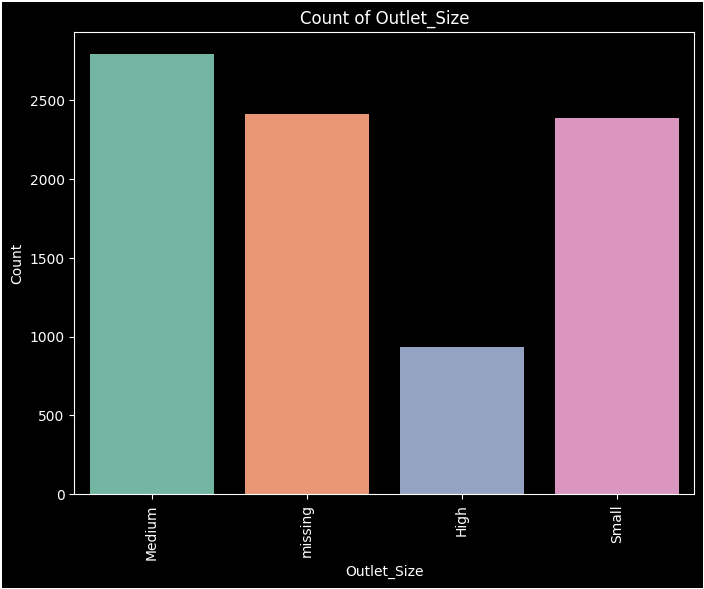

In [36]:
plot_cat(df,cat_cols[4],'Count of Outlet_Size')

- This countplot shows that medium has the highest count while high has the lowest.

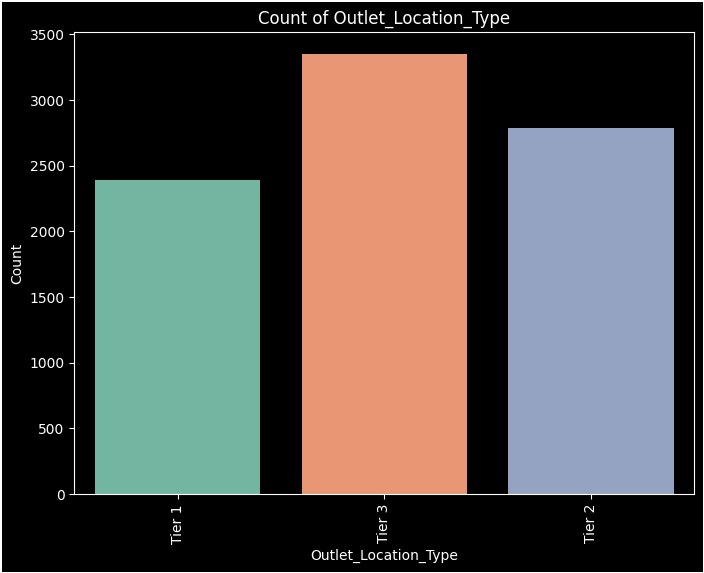

In [37]:
plot_cat(df,cat_cols[5],'Count of Outlet_Location_Type')

- This countplot shows that Tier3 has the highest count.

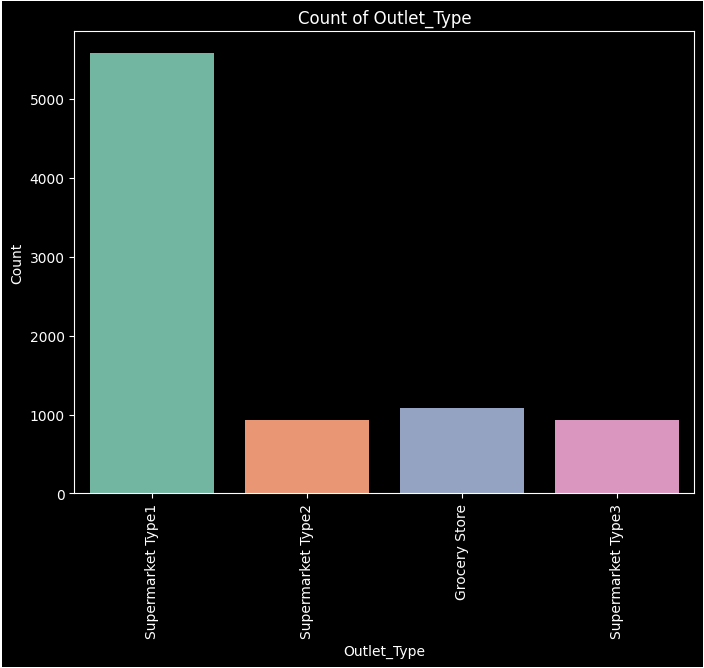

In [38]:
plot_cat(df,cat_cols[6],'Count of Outlet_Type')

- This countplot shows that supermarket type 1 differs from the all and has the highest count

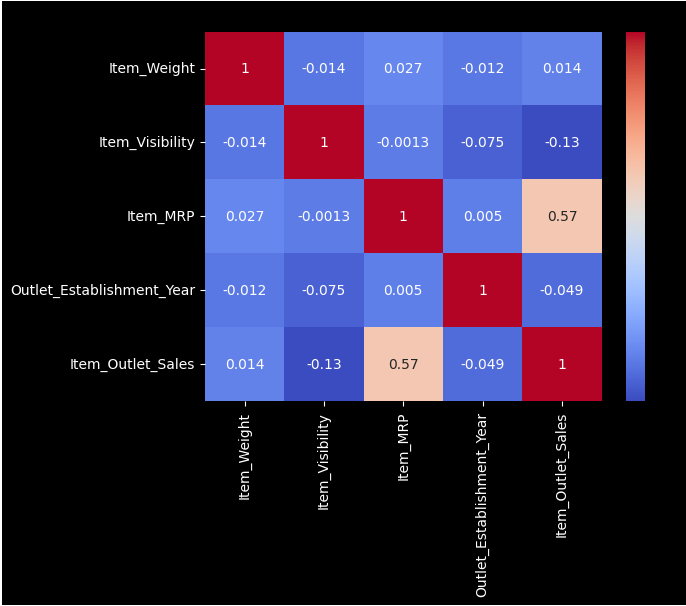

In [39]:
corr = df.corr(numeric_only= True)
ax= sns.heatmap(corr, annot=True,cmap= 'coolwarm')
fig = ax.get_figure()
fig.patch.set_facecolor('black')
fig.patch.set_edgecolor('white')
fig.patch.set_linewidth(2)
ax.tick_params(colors='white')
ax.set_facecolor('black')
ax.set_title('Correlation Heatmap');

- Heatmap shows that there is no any strong correlations.
- There is a moderate positive correlation between Item_MRP and Item_outlet_Sales.

##Feature Inspection

##Remove the placeholders you added in week 2 and replace them with null values.


In [40]:
import numpy as np
df['Outlet_Size'] = df['Outlet_Size'].replace('missing',np.nan)

In [41]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


- I returned the null values

- The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales. The target is Item_Outlet_Sales

##Starting to inspect features!

In [42]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','linewidths':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})",color= 'white')
   # styling
  fig.patch.set_facecolor('black')
  fig.patch.set_edgecolor('white')
  fig.patch.set_linewidth(2)
  for spine in ax.spines.values():
    spine.set_color('white')
  ax.set_facecolor('black')
  ax.tick_params(colors='white')
  ax.set_xlabel(x ,color='white')
  ax.set_ylabel(y,color='white')

  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

In [44]:
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
   temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
   null_count = temp_df[x].isna().sum()
   null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
   if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
   fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
   sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
   ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
   ax.set_title(f"Column: {x}",color ='white')
    # styling
   fig.patch.set_facecolor('black')
   fig.patch.set_edgecolor('white')
   fig.patch.set_linewidth(2)
   for spine in ax.spines.values():
    spine.set_color('white')
   ax.set_facecolor('black')
   ax.tick_params(colors='white')
   ax.set_xlabel(x ,color='white')
   ax.set_ylabel('Count',color='white')


  # Fix layout and show plot (before print statements)
   fig.tight_layout()
   plt.show()

  # Print null value info
   print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
   nunique = temp_df[x].nunique()
   print(f"- Unique Values: {nunique}")
  # First find value counts of feature
   val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
   most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
   freq = val_counts.values[0]
  # Calculate the percentage of the most common value
   perc_most_common = freq / len(temp_df) * 100
  # Print the results
   print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
   if perc_most_common > 98:
     print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
   else:
     print("- Not constant or quasi-constant.")
   return fig, ax


In [45]:
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
   gridspec = {'height_ratios':[0.7,0.3]}
   fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
   sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
   sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
   axes[0].set_title(f"Column: {x}",color='white')
  ## Adjusting subplots to best fill Figure
   fig.tight_layout()
   # styling
   fig.patch.set_facecolor('black')
   fig.patch.set_edgecolor('white')
   fig.patch.set_linewidth(2)
   for spine in axes[0].spines.values():
    spine.set_color('white')
   for spine in axes[1].spines.values():
    spine.set_color('white')
   axes[0].set_facecolor('black')
   axes[1].set_facecolor('black')
   axes[0].tick_params(colors='white')
   axes[1].tick_params(colors='white')
   axes[0].set_xlabel(x ,color='white')
   axes[1].set_xlabel(x ,color='white')
   axes[0].set_ylabel('Count',color='white')

  # Ensure plot is shown before message
   plt.show()
  ## Print message with info on the count and % of null values
   null_count = df[x].isna().sum()
   null_perc = null_count/len(df)* 100
   print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
   nunique = df[x].nunique()
   print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
   most_common_val_count = df[x].value_counts(dropna=False).head(1)
   most_common_val = most_common_val_count.index[0]
   freq = most_common_val_count.values[0]
   perc_most_common = freq / len(df) * 100

   print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
   if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
   else:
    print("- Not constant or quasi-constant.")
   return fig, axes


In [46]:
def plot_categorical_vs_target(df, x, y='SalePrice',figsize=(6,4),fillna = True, placeholder = 'MISSING',order = None):
  # Make a copy of the dataframe and fillna
   temp_df = df.copy()
  # fillna with placeholder
   if fillna == True:
     temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
   else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
   fig, ax = plt.subplots(figsize=figsize)

    # Barplot
   sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Striplot
   sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
   ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right',color='white')


  # Add a title
   ax.set_title(f"{x} vs. {y}",color= 'white')
    # styling
   fig.patch.set_facecolor('black')
   fig.patch.set_edgecolor('white')
   fig.patch.set_linewidth(2)
   for spine in ax.spines.values():
    spine.set_color('white')
   ax.set_facecolor('black')
   ax.tick_params(colors='white')
   ax.set_xlabel(x ,color='white')
   ax.set_ylabel('Count',color='white')

   fig.tight_layout()
   return fig, ax

##1- Item_Weight

- Description: Weight of product

In [47]:
df['Item_Weight'].dtype

dtype('float64')

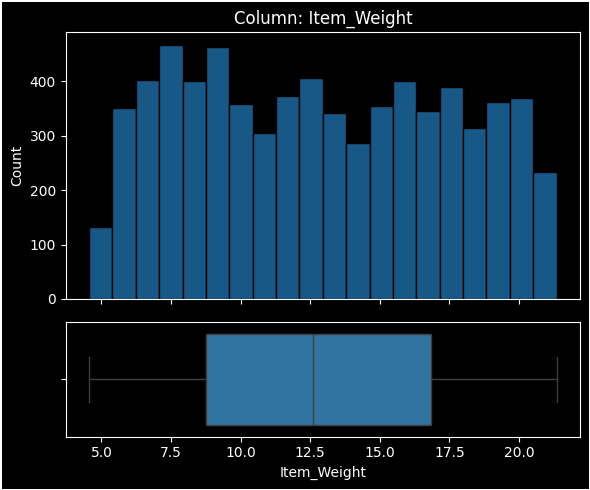

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [48]:
explore_numeric(df,'Item_Weight');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 (17.17%)
  - impute with mean.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



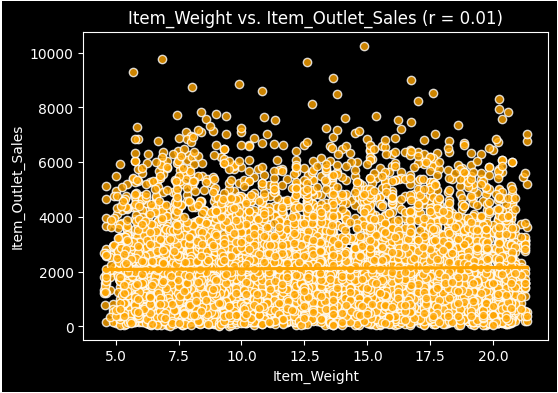

In [49]:
plot_numeric_vs_target(df,'Item_Weight','Item_Outlet_Sales',figsize=(6,4),color='orange');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I assume the highest item weight will have the highest sales.
  - Does this feature appear to be a predictor of the target?
    - No , there is a very weak correlation between them.

___

##2- Item_Fat_Content

- Description: Whether the product is low-fat or regular


In [50]:
df['Item_Fat_Content'].dtype

dtype('O')

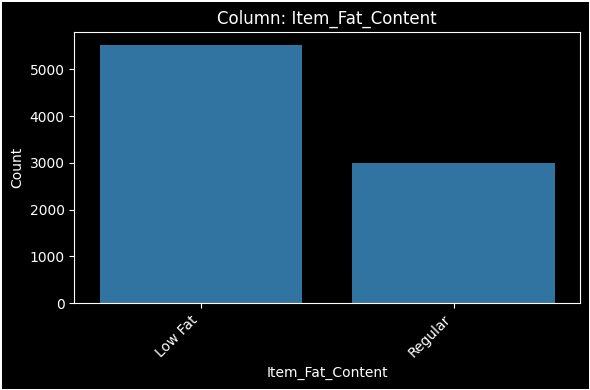

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [51]:
explore_categorical(df,'Item_Fat_Content',order= df['Item_Fat_Content'].value_counts().index);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ordinal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - unigue values(2) very low

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

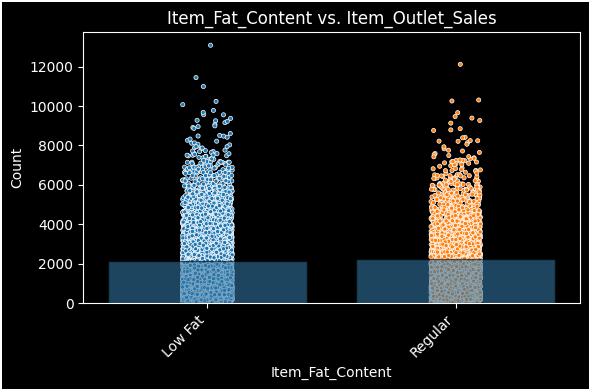

In [52]:
plot_categorical_vs_target(df,'Item_Fat_Content','Item_Outlet_Sales',figsize=(6,4));

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I assume the low fat will have a higher sales.
  - Does this feature appear to be a predictor of the target?
    - No , the sales for low fat and regular are the same or very closer

___

##3- Item_Visibility

Description: The percentage of total display area of all products in a store allocated to the particular product.

In [53]:
df['Item_Visibility'].dtype

dtype('float64')

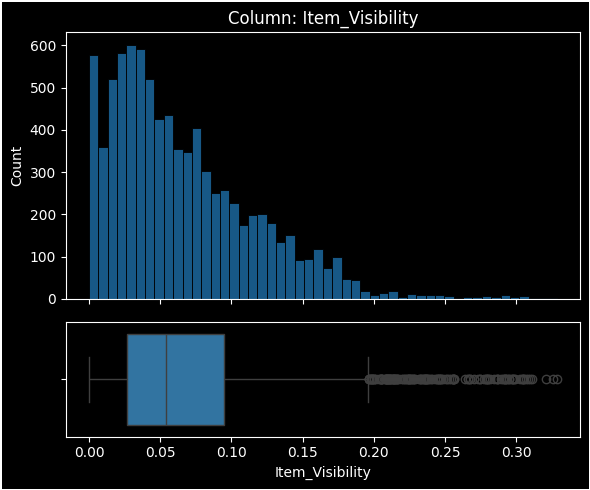

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [54]:
explore_numeric(df,'Item_Visibility');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

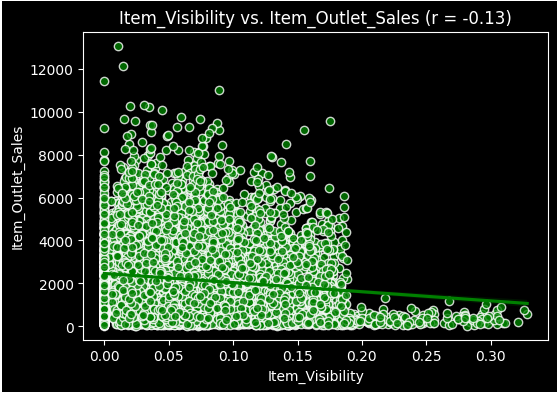

In [55]:
plot_numeric_vs_target(df,'Item_Visibility','Item_Outlet_Sales',figsize=(6,4),color='green');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Maybe
  - Does this feature appear to be a predictor of the target?
    - No , there is a very weak negative correlation between them.

___

##4- Item_type

- Description: The category to which the product belongs

In [56]:
df['Item_Type'].dtype

dtype('O')

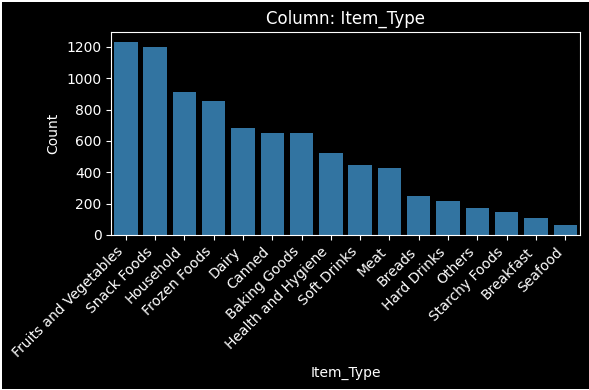

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [57]:
explore_categorical(df,'Item_Type',order= df['Item_Type'].value_counts().index);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - high as the unigue values=16

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

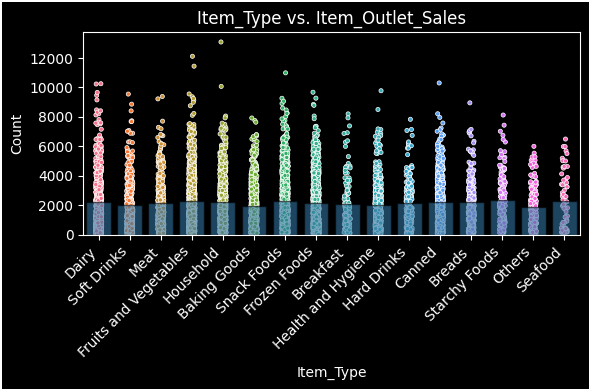

In [58]:
plot_categorical_vs_target(df,'Item_Type','Item_Outlet_Sales',figsize=(6,4));

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No
  - Does this feature appear to be a predictor of the target?
    - No , All categories have sales around 2000

___

## 5- Item_MRP

- Discription: Maximum Retail Price (list price) of the product


In [59]:
df['Item_MRP'].dtype

dtype('float64')

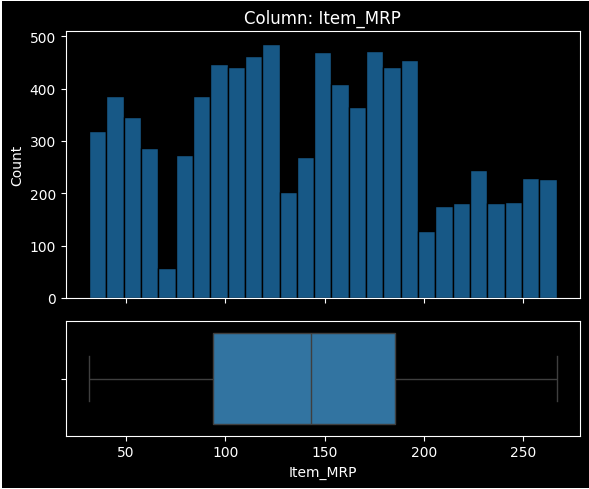

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [60]:
explore_numeric(df,'Item_MRP');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

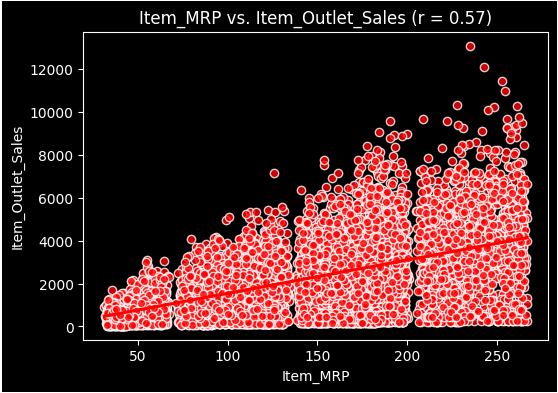

In [61]:
plot_numeric_vs_target(df,'Item_MRP','Item_Outlet_Sales',figsize=(6,4),color='red');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Maybe
  - Does this feature appear to be a predictor of the target?
    - Yes, there is a moderate positive correlation between them

___

##6- Outlet_identifier

- Discription: Store ID

In [62]:
df['Item_Identifier'].dtype

dtype('O')

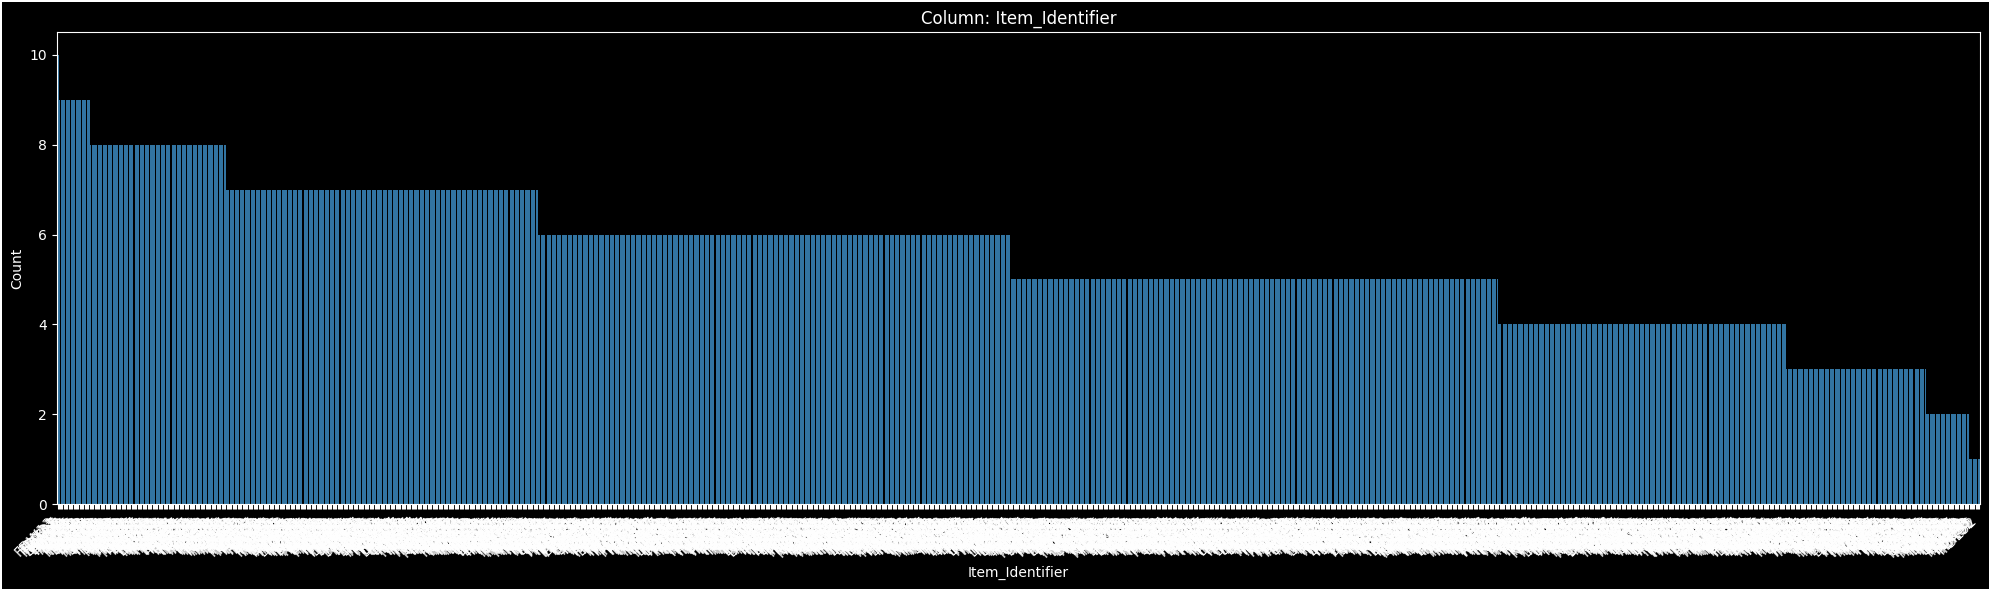

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [63]:
explore_categorical(df,'Item_Identifier',order= df['Item_Identifier'].value_counts().index,figsize=(20,6));

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - very high

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - Maybe

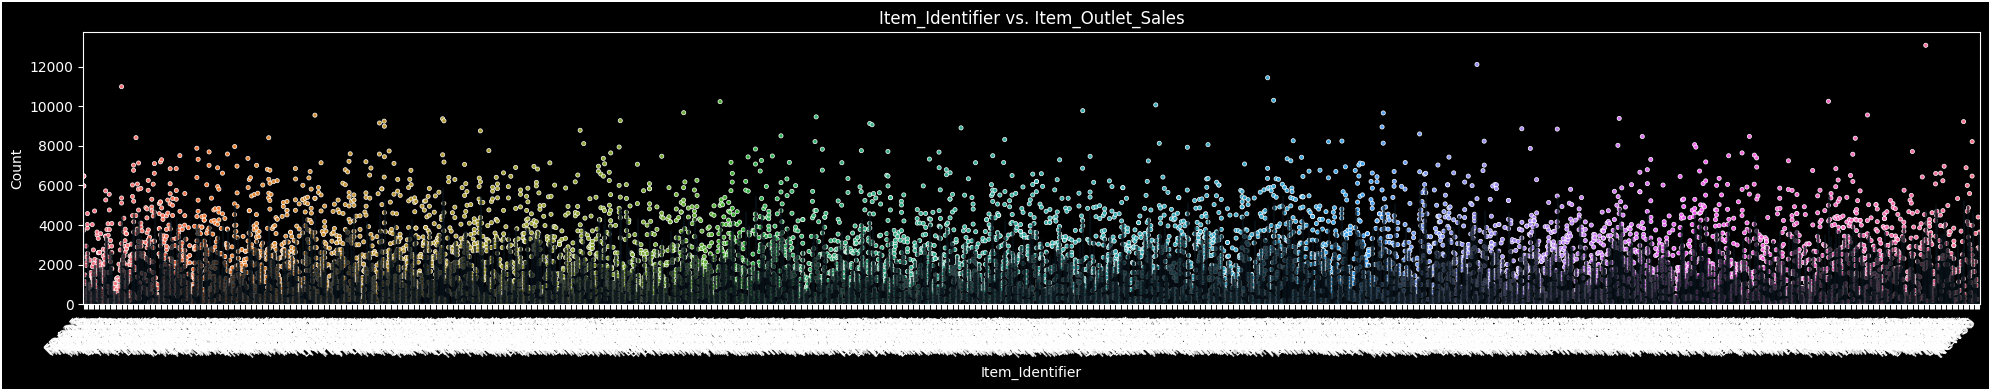

In [64]:
plot_categorical_vs_target(df,'Item_Identifier','Item_Outlet_Sales',figsize=(20,4));

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No
  - Does this feature appear to be a predictor of the target?
    - No

___

##7- Outlet_Establishment_Year

- Discription: Outlet_Establishment_Year

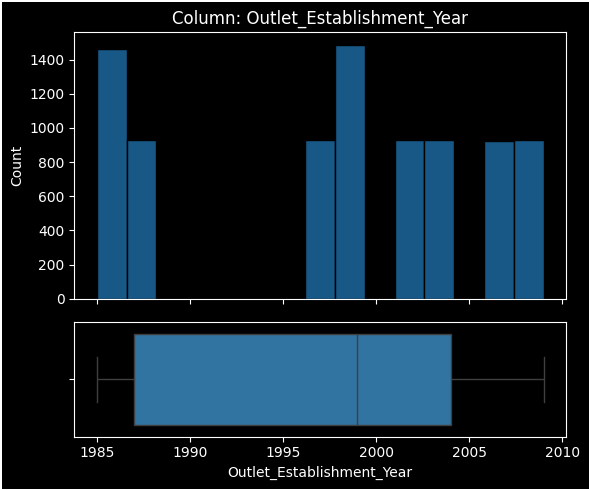

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [65]:
explore_numeric(df,'Outlet_Establishment_Year');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - Maybe.

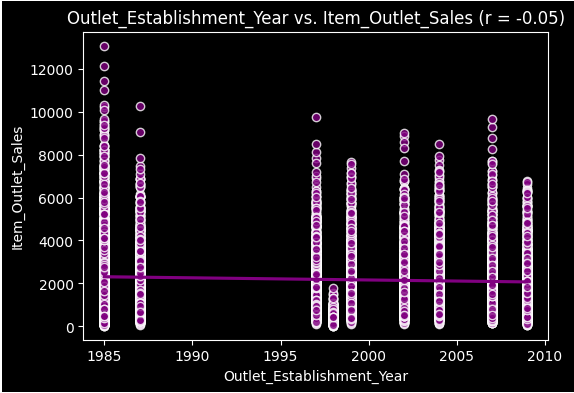

In [66]:
plot_numeric_vs_target(df,'Outlet_Establishment_Year','Item_Outlet_Sales',figsize=(6,4),color='purple');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No
  - Does this feature appear to be a predictor of the target?
    - No , there is a very weak negative correlation between them.

___

## 8- Outlet_Size

- Discription: The size of the store in terms of ground area covered


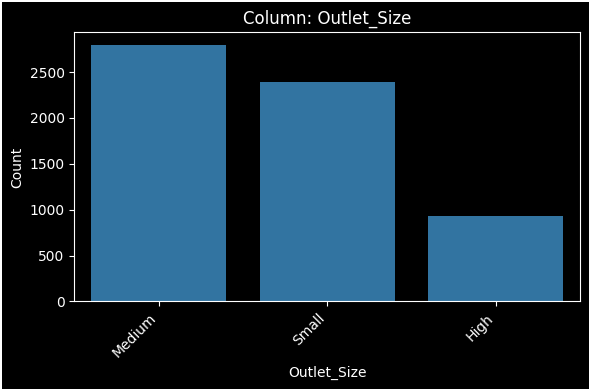

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [67]:
explore_categorical(df,'Outlet_Size',order= df['Outlet_Size'].value_counts().index);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ordinal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 (28.28%)
  - impute with 'missing.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - low.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - Maybe.

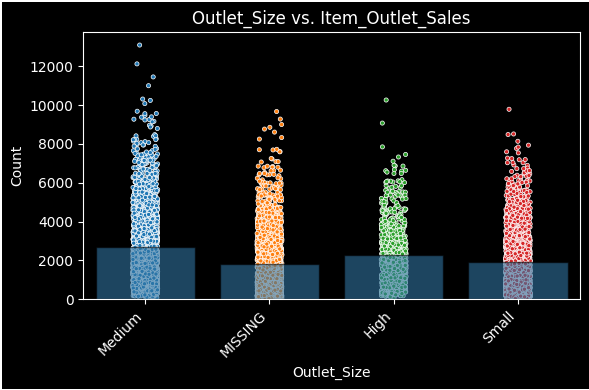

In [68]:
plot_categorical_vs_target(df,'Outlet_Size','Item_Outlet_Sales',figsize=(6,4));

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Maybe.
  - Does this feature appear to be a predictor of the target?
    - Yes, the medium size has the highest sales

___

##9- Outlet_Location_Type

- Discription: The type of area in which the store is located


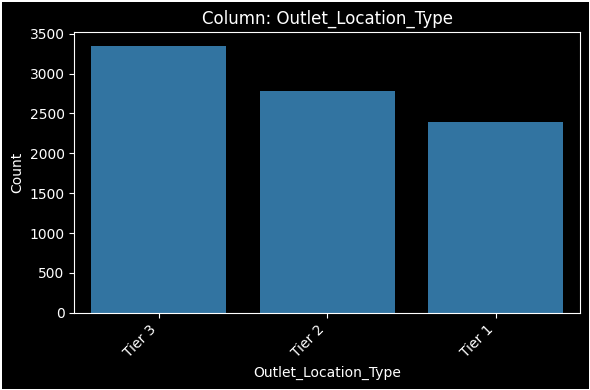

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [69]:
explore_categorical(df,'Outlet_Location_Type',order= df['Outlet_Location_Type'].value_counts().index);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Very low

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - Maybe.

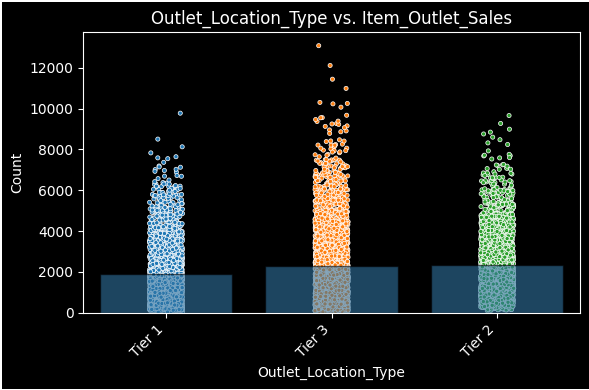

In [70]:
plot_categorical_vs_target(df,'Outlet_Location_Type','Item_Outlet_Sales',figsize=(6,4));

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No.
  - Does this feature appear to be a predictor of the target?
    - No , they all have sales around 2000.

___

##10- Outlet_Type

- Discription: Whether the outlet is a grocery store or some sort of supermarket

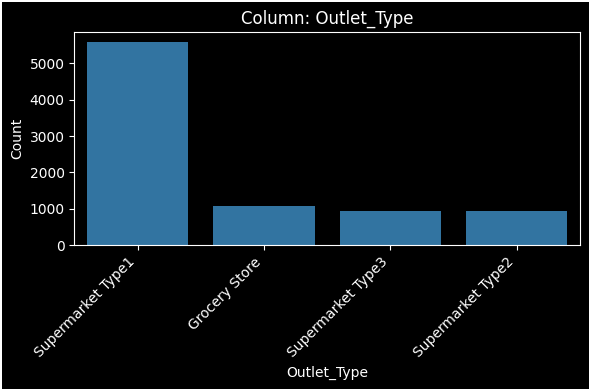

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [71]:
explore_categorical(df,'Outlet_Type',order= df['Outlet_Type'].value_counts().index);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - low.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

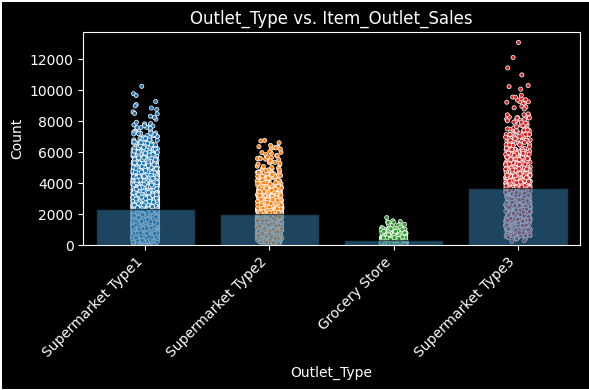

In [72]:
plot_categorical_vs_target(df,'Outlet_Type','Item_Outlet_Sales',figsize=(6,4));

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I assume the biggest supermarket will have a higher sales.
  - Does this feature appear to be a predictor of the target?
    - Yes, supermarket type3 has the highest sales.

___

##11-Item_Outlet_Sales

- Discription: Sales of the product in the particular store. This is the target variable to be predicted

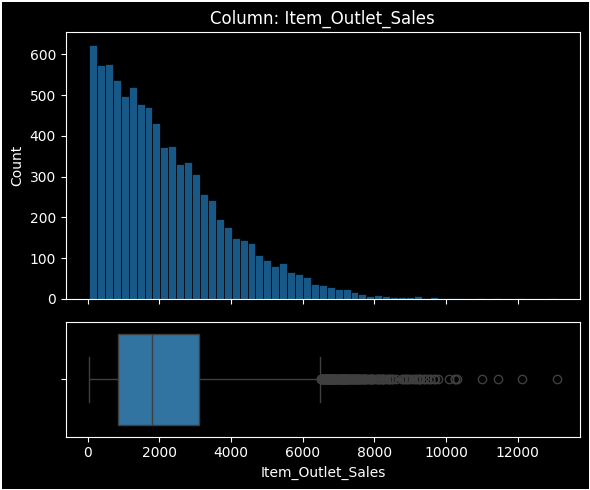

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [73]:
explore_numeric(df,'Item_Outlet_Sales');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric (our target)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - It is not a feature.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - No, it is the target.

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes, it is the target.

## Reload Data to pre-process for machine learning

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(transform_output='pandas')

path= '/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(path)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- check duplicates rows:

In [75]:
df.duplicated().sum()

np.int64(0)

- There are no duplicates rows.
---------------------------------------------------------------

- drop Item_identifier due to its high cardinality:

In [76]:
df = df.drop(columns= 'Item_Identifier')

-----------------------------------------------------------

- check inconsistencies in categorical features:

In [77]:
cat_cols= df.select_dtypes('object').columns
for col in cat_cols:
   print(df[col].value_counts())

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64
Ou

 - there are inconsistencies in Item_Fat_Content:


In [78]:
df['Item_Fat_Content']= df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content']= df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content']= df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


## Train test split:

In [79]:
y =df['Item_Outlet_Sales']
X = df.drop(columns='Item_Outlet_Sales')
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

# Column Transformer:

In [80]:
# split features based on their types
num_cols = X_train.select_dtypes('number').columns
ord_cols =['Item_Fat_Content','Outlet_Size']
cat_cols = X_train.select_dtypes('object').drop(ord_cols,axis=1).columns

In [81]:
#for numeric features ->(SimpleImputer, StandardScaler)
num_imputer = SimpleImputer(strategy='mean')
num_scaler = StandardScaler()
num_pipeline = make_pipeline(num_imputer,num_scaler)
num_tuple = ('numeric',num_pipeline,num_cols)

#for ordinal features ->(SimpleImputer , OrdinalEncoder , StandardScaler)
ord_imputer= SimpleImputer(strategy='most_frequent')
ord_categories_fat_content = ['Low Fat','Regular']
ord_categories_size = ['Small','Medium','High']
categories =[ord_categories_fat_content,ord_categories_size]
ord_encoder = OrdinalEncoder(categories= categories)
ord_scaler = StandardScaler()
ord_pipeline = make_pipeline(ord_imputer,ord_encoder,ord_scaler)
ord_tuple = ('ordinal',ord_pipeline,ord_cols)

#for categorical features ->(SimpleImputer , OneHotEncoder)
cat_imputer = SimpleImputer(strategy='constant',fill_value ='MISSING')
cat_encoder = OneHotEncoder(drop= 'first',sparse_output=False)
cat_pipeline = make_pipeline(cat_imputer,cat_encoder)
cat_tuple = ('categorical',cat_pipeline,cat_cols)
#define a column transformer
col_transformer = ColumnTransformer([num_tuple,ord_tuple,cat_tuple],verbose_feature_names_out=False)
#fit the transformer
col_transformer.fit(X_train)
#transform on training and testing sets
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

- check the processed sets:

In [82]:
X_train_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content,Outlet_Size,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.817249,-0.712775,1.828109,1.327849,-0.740321,0.287374,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7510,0.556340,-1.291052,0.603369,1.327849,1.350766,0.287374,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5828,-0.131512,1.813319,0.244541,0.136187,1.350766,0.287374,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5327,-1.169219,-1.004931,-0.952591,0.732018,-0.740321,-1.384048,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4810,1.528819,-0.965484,-0.336460,0.493686,-0.740321,0.287374,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [83]:
X_train_processed.isna().sum()

,0
Item_Weight,0
Item_Visibility,0
Item_MRP,0
Outlet_Establishment_Year,0
Item_Fat_Content,0
Outlet_Size,0
Item_Type_Breads,0
Item_Type_Breakfast,0
Item_Type_Canned,0
Item_Type_Dairy,0


In [84]:
X_train_processed.dtypes

,0
Item_Weight,float64
Item_Visibility,float64
Item_MRP,float64
Outlet_Establishment_Year,float64
Item_Fat_Content,float64
Outlet_Size,float64
Item_Type_Breads,float64
Item_Type_Breakfast,float64
Item_Type_Canned,float64
Item_Type_Dairy,float64


In [85]:
X_test_processed[num_cols].apply(lambda x: x.describe().round(2))

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,2131.00,2131.00,2131.00,2131.00
mean,-0.04,0.01,-0.06,-0.01
std,1.01,1.04,0.98,0.99
min,-1.97,-1.29,-1.75,-1.53
25%,-0.89,-0.76,-0.78,-1.29
50%,0.00,-0.24,-0.15,0.14
75%,0.73,0.56,0.64,0.73
max,2.00,4.79,1.99,1.33


In [86]:
X_test_processed[ord_cols].apply(lambda x: x.describe().round(2))

,Item_Fat_Content,Outlet_Size
count,2131.00,2131.00
mean,-0.01,0.01
std,1.00,1.01
min,-0.74,-1.38
25%,-0.74,-1.38
50%,-0.74,0.29
75%,1.35,0.29
max,1.35,1.96


##Modeling:

- Build a linear regression model to predict sales

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train_processed,y_train)

LinearRegression()

In [88]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = root_mean_squared_error(y_true, y_pred)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

In [89]:
def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  y_train_pred = reg.predict(X_train)
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,output_dict=output_frame,label='Training Data')
  print()
  y_test_pred = reg.predict(X_test)
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose, output_dict=output_frame,label='Test Data' )
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    results_df = results_df.set_index('Label')
    results_df.index.name=None
    return results_df.round(3)

In [90]:
# evaluate linear regression model
evaluate_regression(lin_reg, X_train_processed, y_train, X_test_processed, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.129
- MSE = 1,297,558.136
- RMSE = 1,139.104
- R^2 = 0.562

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 804.120
- MSE = 1,194,349.715
- RMSE = 1,092.863
- R^2 = 0.567


- To what extent is this model overfit/underfit?
  - It seems that the model is not doing very well in both training and testing set as the R-squared  0.562 in training set and 0.562 in testing set (moderate in both) . And because R^2 in testing set is higher than in training set , we can consider it as underfit problem.

-  Coeffecients Visualization:

In [91]:
def annotate_hbars(ax, ha='left', va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:

        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height() / 2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha, va=va, size=size,
                        xytext=xytext, textcoords=textcoords)

In [92]:
def plot_coeffs(coeffs, top_n=None, figsize=(4,5),
                intercept=False, intercept_name="intercept",
                annotate=False, ha='left', va='center', size=12,
                xytext=(4,0), textcoords='offset points'):
    """ Plots the top_n coefficients from a Series, with optional annotations.
    """
    # Drop intercept if intercept=False and
    if (intercept == False) & (intercept_name in coeffs.index):
        coeffs = coeffs.drop(intercept_name)
    if top_n == None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)

        ## sort features and keep top_n and set title
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient',
            ylabel='Feature Names',
            title=title)
    ax.axvline(0, color='k')
    if annotate == True:
        annotate_hbars(ax, ha=ha, va=va, size=size, xytext=xytext, textcoords=textcoords)
    return ax

In [93]:
coeffs = pd.Series(lin_reg.coef_, index=X_train_processed.columns)
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")
coeffs.loc['intercept'] = lin_reg.intercept_
coeffs

,0
Item_Weight,-8.19
Item_Visibility,-21.65
Item_MRP,984.51
Outlet_Establishment_Year,-211.95
Item_Fat_Content,29.95
Outlet_Size,132.74
Item_Type_Breads,-28.65
Item_Type_Breakfast,45.36
Item_Type_Canned,27.52
Item_Type_Dairy,-106.34


In [94]:
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
coeff_rank

,0
Outlet_Type_Supermarket Type3,36.00
Outlet_Identifier_OUT027,35.00
Outlet_Type_Supermarket Type1,34.00
Item_MRP,33.00
Outlet_Identifier_OUT018,32.00
Outlet_Type_Supermarket Type2,31.00
intercept,30.00
Outlet_Identifier_OUT019,29.00
Outlet_Location_Type_Tier 3,28.00
Outlet_Identifier_OUT046,27.00


In [95]:
top_n_features = coeff_rank.head(10)
top_n_features

,0
Outlet_Type_Supermarket Type3,36.00
Outlet_Identifier_OUT027,35.00
Outlet_Type_Supermarket Type1,34.00
Item_MRP,33.00
Outlet_Identifier_OUT018,32.00
Outlet_Type_Supermarket Type2,31.00
intercept,30.00
Outlet_Identifier_OUT019,29.00
Outlet_Location_Type_Tier 3,28.00
Outlet_Identifier_OUT046,27.00


In [96]:
top_n = 15
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
top_n_features = coeff_rank.head(top_n).index
plot_vals = coeffs.loc[top_n_features].sort_values()
plot_vals

,0
Outlet_Identifier_OUT019,-550.67
Outlet_Location_Type_Tier 3,-475.30
Outlet_Identifier_OUT013,233.68
Outlet_Identifier_OUT049,306.90
Item_Type_Seafood,327.50
Outlet_Identifier_OUT035,338.20
Outlet_Location_Type_Tier 2,352.34
Outlet_Identifier_OUT046,366.74
intercept,801.46
Outlet_Type_Supermarket Type2,967.93


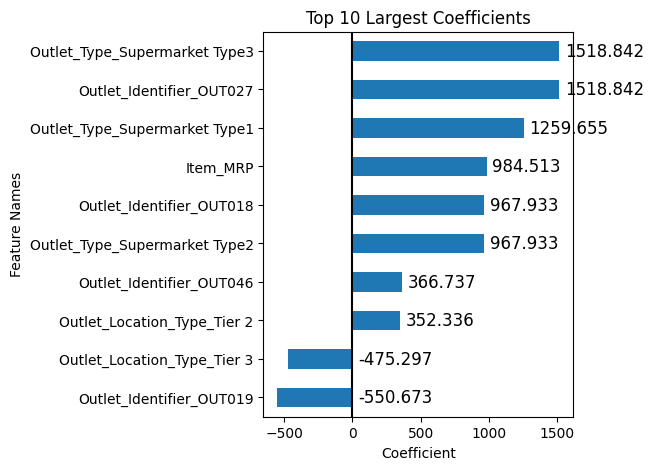

In [110]:
plot_coeffs(pd.Series(lin_reg.coef_, index=X_train_processed.columns), top_n=10, annotate=True);

- Intercept:
    - Our model assumed a baseline score of 801.46
- Coefficients that Positively Influence sales:
    - Outlet_type_supermarket_type3: Being in the supermarket_type3 increases sales by 1518.842 dollars.
    - Outlet_identifier_OUT072: Having an identifier OUT072 increases sales by  1518.842 dollars.
    - Outlet_type_supermarket_type1: Being in the supermarket_type1 increases by 1259.655 dollars.


- Coefficients that Negatively Influence sales:
  - Outlet_location-Tier3:Being in tier 3 location decreases the sales by 475.297 dollars.
  - Outlet_identifier_OUT019: decreases the sales by 550.673 dollars.

- Try Random forest model:

In [98]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_processed,y_train)

RandomForestRegressor(random_state=42)

In [99]:
# evaluate random forest model
evaluate_regression(rf_reg, X_train_processed, y_train, X_test_processed, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 297.300
- MSE = 183,822.782
- RMSE = 428.746
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 774.444
- MSE = 1,232,831.387
- RMSE = 1,110.329
- R^2 = 0.553


-  To what extent is this model overfit/underfit?
 - The model is overfitting as the R^2 in the training set is higher than in the testing set.

- Compare this model's performance to the linear regression model: which model has the best test scores?
  - it seems that linear regression is better than forest tree as forest tree has a high overfitting and must be tuned while in linear regression quality in both training and testing sets are close.

- Tune at least two hyperparameters :

In [100]:
rf_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [101]:
from sklearn.model_selection import GridSearchCV
params_grid={'n_estimators':[100,150,200,10],
             'max_features':['sqrt','log2',None],
             'max_depth':[None,10,15,20],
             'min_samples_leaf':[2,3,4]}
grid_search = GridSearchCV(estimator=rf_reg,param_grid=params_grid,n_jobs= -1, verbose= 1)
grid_search.fit(X_train_processed,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 15, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [2, 3, 4],
                         'n_estimators': [100, 150, 200, 10]},
             verbose=1)

In [102]:
best_rf_reg = grid_search.best_estimator_
evaluate_regression(best_rf_reg, X_train_processed, y_train, X_test_processed, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 643.614
- MSE = 843,142.323
- RMSE = 918.228
- R^2 = 0.715

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 736.787
- MSE = 1,116,781.998
- RMSE = 1,056.779
- R^2 = 0.595


- did the performance improve?
   - yes , as we minimize the overfitting by decreasing r^2 in training set from 0.937 to 0.716 . also , r^2 in testing set improved from 0.559 to 0.590

##Feature importance:

In [111]:
def plot_importance_color(importances, top_n=None,  figsize=(5,4),
                          color_dict=None):

    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors)

    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize)

    # set titles and axis labels
    ax.set(xlabel='Importance',
           ylabel='Feature Names',
           title=title)

    ## return ax in case want to continue to update/modify figure
    return ax

In [105]:
from sklearn.inspection import permutation_importance
r = permutation_importance(best_rf_reg, X_test_processed, y_test, n_repeats=5, random_state=42)
permutation_importance = pd.Series(r.importances_mean, index=X_test_processed.columns,name='permutation importance')
permutation_importance = permutation_importance.sort_values(ascending= False)
permutation_importance

,permutation importance
Item_MRP,0.73
Outlet_Type_Supermarket Type1,0.43
Outlet_Identifier_OUT027,0.19
Outlet_Type_Supermarket Type3,0.09
Outlet_Establishment_Year,0.02
Outlet_Type_Supermarket Type2,0.00
Outlet_Identifier_OUT018,0.00
Item_Visibility,0.00
Item_Type_Fruits and Vegetables,0.00
Outlet_Identifier_OUT045,0.00


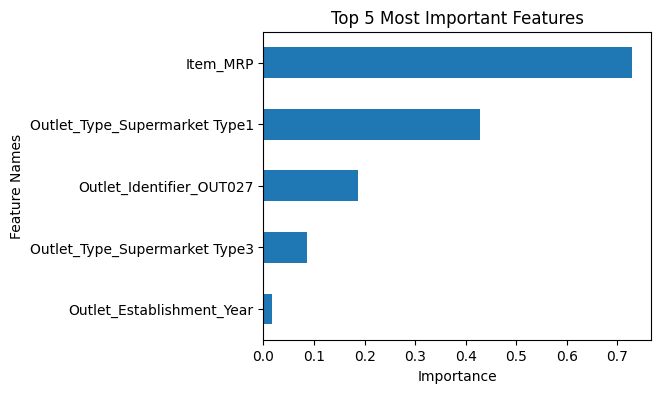

In [112]:
plot_importance_color(permutation_importance, top_n=5);

## Evaluation
- Overall, which model do you recommend? Justify your recommendation.
-Interpret your model's performance based on R-squared in a way that your non-technical stakeholder can understand.
   - I select linear regression as the gap between r^2 in training set and r^2 in testing set is the smallest , that mean every thing the model learned , it predicts it closer to what it is acutally .
- Select another regression metric (RMSE/MAE/MSE) to express the performance of your model to your stakeholder.
     - I select RMSE. the model predicts sales with errors about 1092$ higher or lower than the actual sale.
- Include why you selected this metric to explain to your stakeholder.
    - As it is easy to understand and interpret because it is measuared in the same unit as the target (dollar) Also , it punishes large errors.
- Compare the training vs. test scores and answer the question: to what extent is this model overfit/underfit?
  - it seems to be a bit underfitting .
    ------------------------------------------------------------
-  Regression Metrics: Training Data
     - MAE = 847.129
     - MSE = 1,297,558.136
     - RMSE = 1,139.104
     - R^2 = 0.562
------------------------------------------------------------
  -  Regression Metrics: Test Data
      - MAE = 804.120
      - MSE = 1,194,349.715
      - RMSE = 1,092.863
      - R^2 = 0.567